Proteins: TP53, AURKA, CDK1, XPO1, STK11

# Examine trans effect of TP53 Hotspot mutation in Ovarian Cancer

#### Library Imports

In [1]:
import pandas as pd
import numpy as np
import scipy.stats

import cptac
import cptac.utils as ut

import seaborn as sns
import matplotlib as plt

co = cptac.Ovarian()

/anaconda3/lib/python3.6/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.25.3) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


## Use parse hotspot utility to analyze TP53 hotspot mutation in Ovarian cancer

#### Get somatic mutation data from cptac

In [2]:
somatic_mutations = co.get_somatic_mutation()

#### Use parse hotspot utility

In [3]:
vis, binary, detailed, dictionary = ut.parse_hotspot('../../HotspotClusterFiles/ovarian_somatic_38.maf.3D_Proximity.pairwise.recurrence.l0.r10.clusters', somatic_mutations)

In [4]:
vis

,hotspot_id,patients_within
0,ADH1A,2.0
1,CDCA2,3.0
2,CPS1,2.0
3,EIF4A1,3.0
4,FGF18,3.0
5,GCA,2.0
6,GOT1,2.0
7,HNRNPM,3.0
8,KDM2A,2.0
9,KHK,2.0


#### Select only TP53 Hotspots

In [5]:
#There are 5 TP53 hotspots
TP53_Hotspots = detailed[['TP53','TP53_1','TP53_2','TP53_3','TP53_4']]
TP53_Hotspots.head()

,TP53,TP53_1,TP53_2,TP53_3,TP53_4
sample_id,,,,,
S002,No,No,No,No,No
S006,No,No,No,No,No
S007,No,Yes_HS,No,No,No
S009,No,Yes,No,No,No
S011,No,Yes,No,No,No


#### Make binary column for samples that have a TP53 Hotspot Mutation

In [6]:
TP53_Hotspots['Hotspot_Mutation'] = ''
for ind, row in TP53_Hotspots.iterrows():
    for col in TP53_Hotspots.columns:
        if row[col] == 'Yes_HS':
            TP53_Hotspots.loc[ind,'Hotspot_Mutation'] = 'TP53_Hotspot_Mutation'

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

In [7]:
binary_hotspots = TP53_Hotspots['Hotspot_Mutation']

#### Get Proteomic data, append Binary hotspot mutation column

In [8]:
proteomics_df = co.join_omics_to_mutations(omics_genes=['TP53','AURKA','CDK1','XPO1','STK11'],omics_df_name='proteomics', mutations_genes='TP53')
proteomics_df

Name,AURKA_proteomics,CDK1_proteomics,STK11_proteomics,TP53_proteomics,XPO1_proteomics,TP53_Mutation,TP53_Location,TP53_Mutation_Status,Sample_Status
Database_ID,NP_001310232,NP_001777,NP_000446,NP_000537,NP_003391,NaN,NaN,NaN,NaN
Patient_ID,,,,,,,,,
S002,-0.621241,-0.745212,0.189093,-1.600876,0.191521,[Frame_Shift_Del],[p.D61*],Single_mutation,Tumor
S006,0.416099,0.466097,-0.256113,-1.685874,0.473283,[Frame_Shift_Del],[p.S90Vfs*55],Single_mutation,Tumor
S007,-0.302865,0.272087,-0.083314,0.846640,0.366800,[Missense_Mutation],[p.R273C],Single_mutation,Tumor
S009,0.424056,-0.002221,-0.267422,0.419432,0.077574,[Missense_Mutation],[p.I195T],Single_mutation,Tumor
S011,NaN,0.109734,0.171339,-2.459607,0.170988,[Frame_Shift_Ins],[p.C124Lfs*25],Single_mutation,Tumor
S012,NaN,0.414026,0.290676,-1.017320,0.234806,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor
S013,-0.564741,-1.287543,0.565342,-0.749927,0.645797,[Splice_Site],[p.X261_splice],Single_mutation,Tumor
S015,NaN,1.357564,-0.559616,1.213573,1.006944,[Missense_Mutation],[p.C141Y],Single_mutation,Tumor


In [9]:
proteomics_df = co.join_omics_to_mutations(omics_genes=['TP53','AURKA','CDK1','XPO1','STK11'], omics_df_name='proteomics', mutations_genes='TP53')

proteomics_df = co.reduce_multiindex(proteomics_df, levels_to_drop='Database_ID')
#Remove Non-Tumor Samples
proteomics_df = proteomics_df.loc[proteomics_df['Sample_Status'] == 'Tumor']

#Remove columns that are not needed
proteomics_df = proteomics_df.drop(['TP53_Location','Sample_Status'],axis=1)
proteomics_df['TP53_Hotspot_Mutation'] = binary_hotspots

#drop nan from tp53 hotspot col
#proteomics_df = proteomics_df[pd.notnull(proteomics_df['TP53_Hotspot_Mutation'])]

proteomics_df

Name,AURKA_proteomics,CDK1_proteomics,STK11_proteomics,TP53_proteomics,XPO1_proteomics,TP53_Mutation,TP53_Mutation_Status,TP53_Hotspot_Mutation
Patient_ID,,,,,,,,
S002,-0.621241,-0.745212,0.189093,-1.600876,0.191521,[Frame_Shift_Del],Single_mutation,
S006,0.416099,0.466097,-0.256113,-1.685874,0.473283,[Frame_Shift_Del],Single_mutation,
S007,-0.302865,0.272087,-0.083314,0.846640,0.366800,[Missense_Mutation],Single_mutation,TP53_Hotspot_Mutation
S009,0.424056,-0.002221,-0.267422,0.419432,0.077574,[Missense_Mutation],Single_mutation,
S011,NaN,0.109734,0.171339,-2.459607,0.170988,[Frame_Shift_Ins],Single_mutation,
S012,NaN,0.414026,0.290676,-1.017320,0.234806,[Wildtype_Tumor],Wildtype_Tumor,
S013,-0.564741,-1.287543,0.565342,-0.749927,0.645797,[Splice_Site],Single_mutation,
S015,NaN,1.357564,-0.559616,1.213573,1.006944,[Missense_Mutation],Single_mutation,
S016,NaN,0.031561,0.132389,-1.370643,0.326999,[Frame_Shift_Ins],Single_mutation,


In [10]:
help(co.reduce_multiindex)

Help on method reduce_multiindex in module cptac.dataset:

reduce_multiindex(df, levels_to_drop=None, flatten=False, sep='_') method of cptac.ovarian.Ovarian instance
    Drop levels from and/or flatten the column axis of a dataframe with a column multiindex.
    
    Parameters:
    df (pandas DataFrame): The dataframe to make the changes to.
    levels_to_drop (str, int, or list or array-like of str or int, optional): Levels, or indices of levels, to drop from the dataframe's column multiindex. These must match the names or indices of actual levels of the multiindex. Must be either all strings, or all ints. Default of None will drop no levels.
    flatten (bool, optional): Whether or not to flatten the multiindex. Default of False will not flatten.
    sep (str, optional): String to use to separate index levels when flattening. Default is underscore.
    
    Returns:
    pandas DataFrame: The dataframe, with the desired column index changes made.



In [11]:
for ind, row in proteomics_df.iterrows():
    if row['TP53_Hotspot_Mutation'] == 'TP53_Hotspot_Mutation':
        proteomics_df.loc[ind, 'TP53_Categorical'] = 'Hotspot_Missense'
        
    if 'Frame_Shift_Ins' in row['TP53_Mutation'] or 'Frame_Shift_Del' in row['TP53_Mutation'] or 'Nonsense_Mutation' in row['TP53_Mutation']:
        proteomics_df.loc[ind, 'TP53_Categorical'] = 'Truncation'
        
    if row['TP53_Mutation_Status'] == 'Wildtype_Tumor':
        proteomics_df.loc[ind, 'TP53_Categorical'] = 'Wildtype'
        
    if row['TP53_Hotspot_Mutation'] != 'TP53_Hotspot_Mutation':
        if 'Missense_Mutation' in row['TP53_Mutation'] or 'In_Frame_Del' in row['TP53_Mutation'] or 'In_Frame_Ins' in row['TP53_Mutation'] or 'Splice_Site' in row['TP53_Mutation']:
            proteomics_df.loc[ind, 'TP53_Categorical'] = 'Other_Missense'
        
proteomics_df = proteomics_df.drop(['TP53_Mutation', 'TP53_Mutation_Status', 'TP53_Hotspot_Mutation'], axis = 1)
proteomics_df

Name,AURKA_proteomics,CDK1_proteomics,STK11_proteomics,TP53_proteomics,XPO1_proteomics,TP53_Categorical
Patient_ID,,,,,,
S002,-0.621241,-0.745212,0.189093,-1.600876,0.191521,Truncation
S006,0.416099,0.466097,-0.256113,-1.685874,0.473283,Truncation
S007,-0.302865,0.272087,-0.083314,0.846640,0.366800,Hotspot_Missense
S009,0.424056,-0.002221,-0.267422,0.419432,0.077574,Other_Missense
S011,NaN,0.109734,0.171339,-2.459607,0.170988,Truncation
S012,NaN,0.414026,0.290676,-1.017320,0.234806,Wildtype
S013,-0.564741,-1.287543,0.565342,-0.749927,0.645797,Other_Missense
S015,NaN,1.357564,-0.559616,1.213573,1.006944,Other_Missense
S016,NaN,0.031561,0.132389,-1.370643,0.326999,Truncation


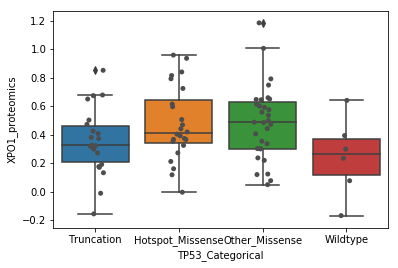

In [13]:
plot = sns.boxplot(data=proteomics_df, y = 'XPO1_proteomics', x='TP53_Categorical')
plot = sns.stripplot(data=proteomics_df, y = 'XPO1_proteomics', x='TP53_Categorical', color='.3')

#### Use wrap_ttest to do a comparison on each proteomics value, comparing samples with a hotspot mutation to those without a hotspot mutation

In [ ]:
compar_cols = list(proteomics_df.columns)
compar_cols.remove('TP53_Hotspot_Mutation')
wrap_results = ut.wrap_ttest(proteomics_df, comparison_columns=compar_cols, label_column='TP53_Hotspot_Mutation')

In [ ]:
wrap_results